<a href="https://colab.research.google.com/github/yakupkaplan/Deep-Learning-Materials/blob/main/Deep%20Learning%20A-Z%E2%84%A2%7C%20Python%20ile%20Derin%20%C3%96%C4%9Frenme/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST - CNN

**Colab** Identification

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Library Installation

In [ ]:
!pip3 install -q keras

### Take a look at MNIST dataset


![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

**Load dependencies...**

In [2]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random


**Load dataset**

In [3]:
#Veri setlerini yükleme
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Show an example

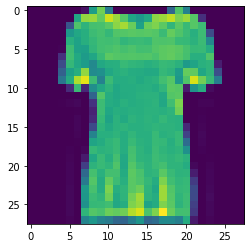

In [4]:
plt.imshow(x_train[10])

### Take a look at classes!

In [5]:
# fashion mnist etiket isimleri
fashion_mnist_labels = np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bilekte Bot'])

**Let's take the weights of the previously trained model from the `model_fashion-mnist_cnn_train2_epoch24.h5` file and pre-process the input images according to the model input!**

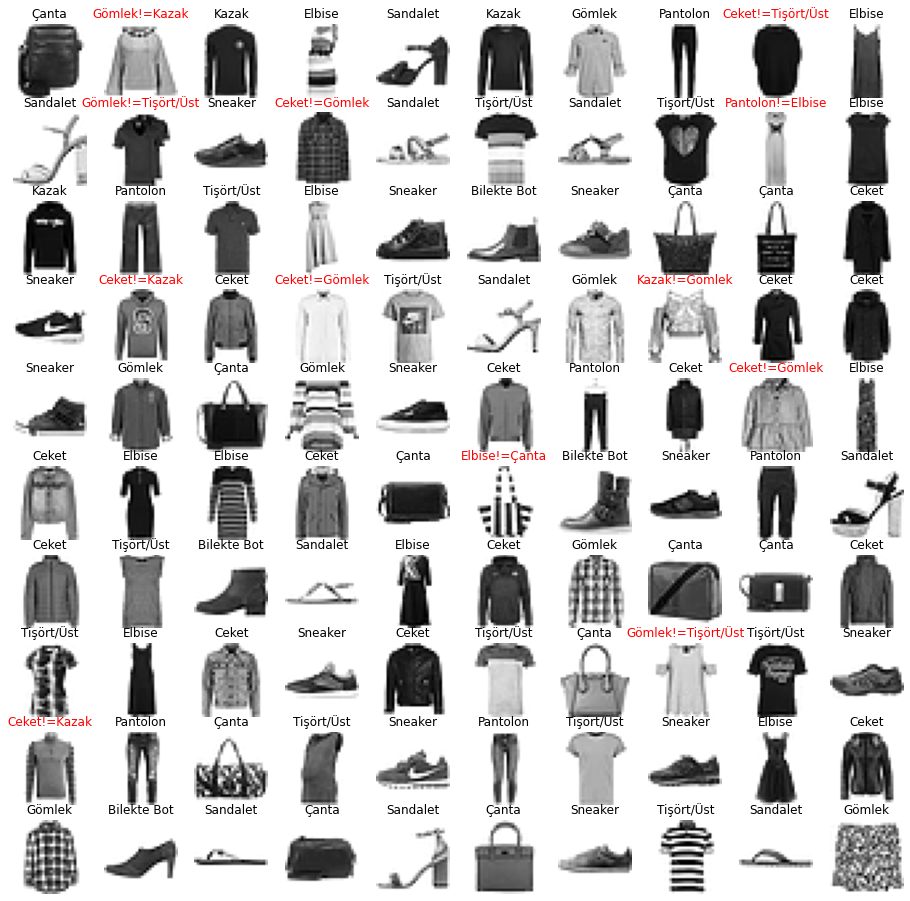

Number of true predicitons: 88
Number of errors: 12
Ratio of true predicitons: 88.0 %


In [16]:
root = '/content/drive/MyDrive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima/save_models/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5')

    
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255
    return image.reshape(1,28,28,1)
plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("Number of true predicitons:", right)
print("Number of errors:", mistake)
print("Ratio of true predicitons:", right/(mistake + right)*100, '%')